In [1]:
%matplotlib inline  

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.io import imread

from scipy.ndimage import convolve

# Live Demo Working with Images and Text

In [6]:
tiger_image = imread('Data/tiger.jpg')

In [8]:
tiger_image.shape

(600, 580, 3)

In [10]:
tiger_image.dtype

dtype('uint8')

In [11]:
tiger_image[20, 100]

array([235, 235, 233], dtype=uint8)

In [20]:
# Extracting color channels separately
r, g, b = tiger_image[:, :, 0], tiger_image[:, :, 1], tiger_image[:, :, 2]

In [21]:
r.shape

(600, 580)

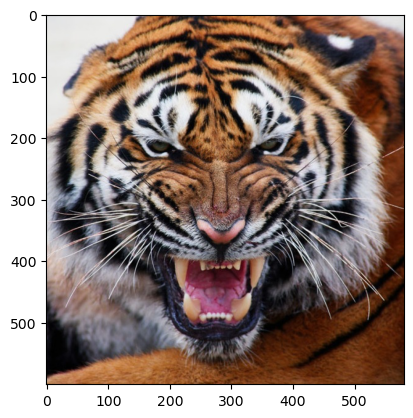

In [18]:
plt.imshow(tiger_image)
plt.show()

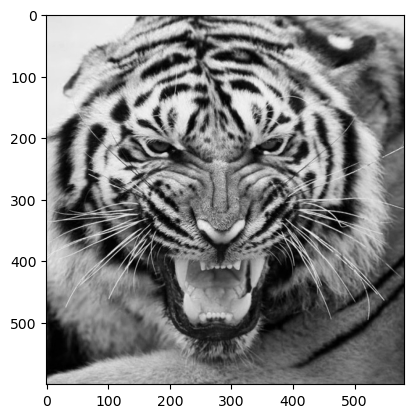

In [23]:
plt.imshow(r, cmap = 'gray')
plt.show()

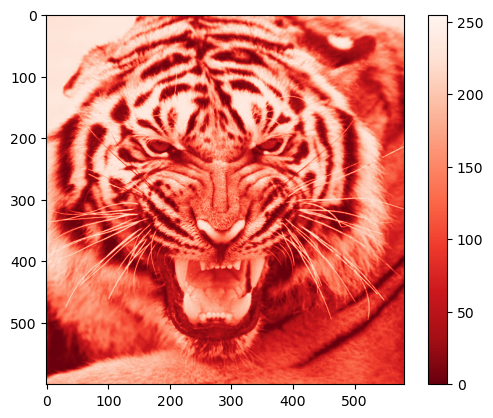

In [27]:
# Reds_r reverse the colorbar
plt.imshow(r, cmap = 'Reds_r')
plt.colorbar()
plt.show()

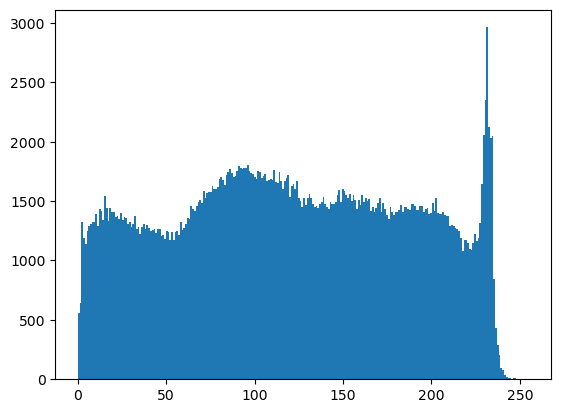

In [31]:
# Ravel will concatenate all rows in one row
plt.hist(r.ravel(), bins = 256)
plt.show()

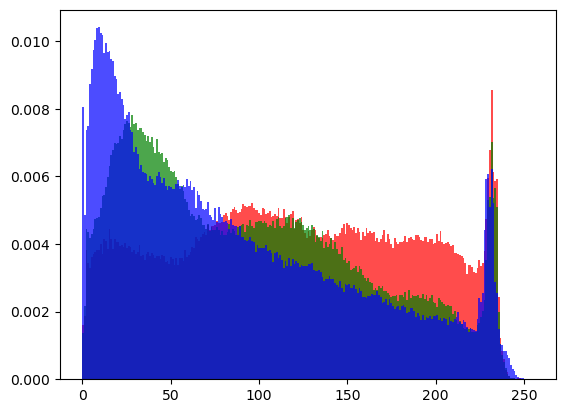

In [34]:
# Density = True normalizes the values along the ordinate axis.
plt.hist(r.ravel(), bins = 256, color = 'r', alpha = 0.7, density = True)
plt.hist(g.ravel(), bins = 256, color = 'g', alpha = 0.7, density = True)
plt.hist(b.ravel(), bins = 256, color = 'b', alpha = 0.7, density = True)

plt.show()

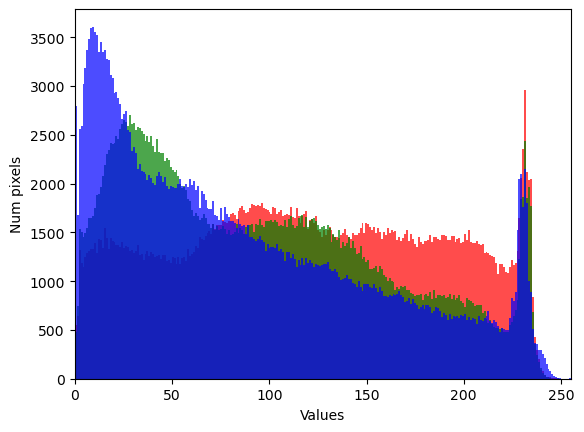

In [36]:
plt.hist(r.ravel(), bins = 256, color = 'r', alpha = 0.7)
plt.hist(g.ravel(), bins = 256, color = 'g', alpha = 0.7)
plt.hist(b.ravel(), bins = 256, color = 'b', alpha = 0.7)
plt.xlabel('Values')
plt.ylabel('Num pixels')

plt.xlim(0, 255)

plt.show()

In [37]:
# Color perception of the human eye
tiger_grayscale = 0.299 * r + 0.587 * g + 0.114 * b

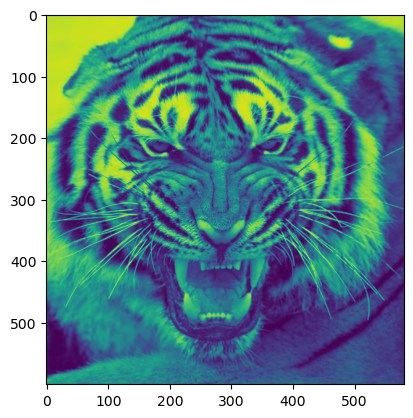

In [39]:
plt.imshow(tiger_grayscale)
plt.show()

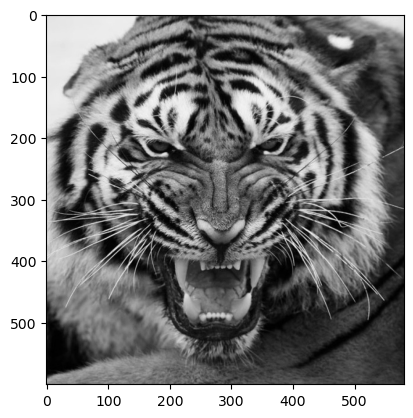

In [40]:
plt.imshow(tiger_grayscale, cmap = 'gray')
plt.show()

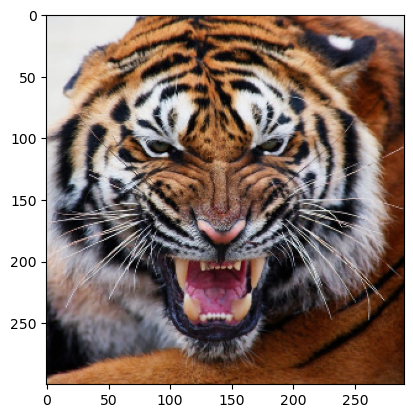

In [43]:
# Down sampling - reduces the size of the image
plt.imshow(tiger_image[::2,::2,:], cmap = 'gray')
plt.show()

In [46]:
tiger_image[::2,::2,:].shape

(300, 290, 3)

In [47]:
tiger_image.shape

(600, 580, 3)

In [49]:
np.product(tiger_image[::2,::2,:].shape), np.product(tiger_image.shape), np.product(tiger_image.shape) / np.product(tiger_image[::2,::2,:].shape)

(261000, 1044000, 4.0)

## Convolution

### Blending an image with a smaller matrix called a filter

In [54]:
tiger_sample = tiger_grayscale[100:110, 100:110].astype(int)

In [55]:
tiger_sample

array([[159, 154, 151, 144, 126, 108, 105, 106, 118, 113],
       [158, 144, 136, 132, 118, 104,  92,  82,  90,  91],
       [155, 137, 124, 123, 111, 103,  90,  77,  77,  80],
       [149, 132, 116, 107, 111, 114, 103,  88,  81,  74],
       [138, 121, 105, 103, 115, 119, 118, 103,  83,  67],
       [133, 116, 104, 107, 113, 115, 109,  92,  73,  61],
       [131, 117, 108, 111, 112, 104,  90,  77,  71,  65],
       [119, 105,  94,  94,  99, 101,  92,  77,  68,  60],
       [111, 103,  98,  95,  94, 104, 100,  80,  62,  56],
       [101, 100, 100,  97,  96,  93,  87,  72,  59,  58]])

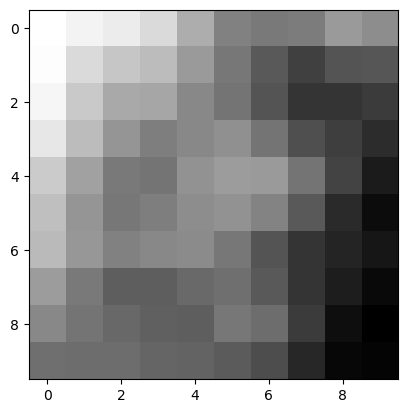

In [56]:
plt.imshow(tiger_sample, cmap = 'gray')
plt.show()

In [51]:
conv_filter = np.array([
    [0, 1, 0],
    [0, -1, 0],
    [0, 1, 0]
])

In [59]:
tiger_convolve = convolve(tiger_sample, conv_filter)

In [66]:
convolve(tiger_sample, conv_filter).shape

(10, 10)

In [60]:
tiger_convolve

array([[158, 144, 136, 132, 118, 104,  92,  82,  90,  91],
       [156, 147, 139, 135, 119, 107, 103, 101, 105, 102],
       [152, 139, 128, 116, 118, 115, 105,  93,  94,  85],
       [144, 126, 113, 119, 115, 108, 105,  92,  79,  73],
       [144, 127, 115, 111, 109, 110,  94,  77,  71,  68],
       [136, 122, 109, 107, 114, 108,  99,  88,  81,  71],
       [121, 104,  90,  90, 100, 112, 111,  92,  70,  56],
       [123, 115, 112, 112, 107, 107,  98,  80,  65,  61],
       [109, 102,  96,  96, 101,  90,  79,  69,  65,  62],
       [111, 103,  98,  95,  94, 104, 100,  80,  62,  56]])

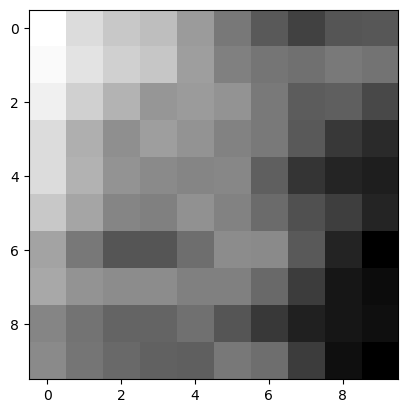

In [61]:
plt.imshow(tiger_convolve, cmap = 'gray')
plt.show()

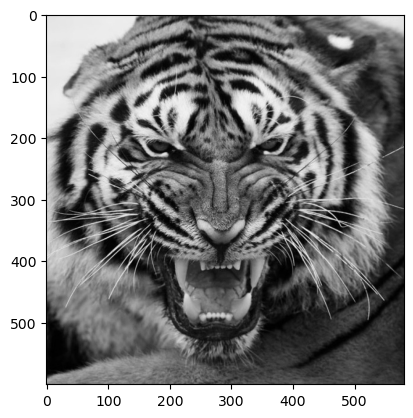

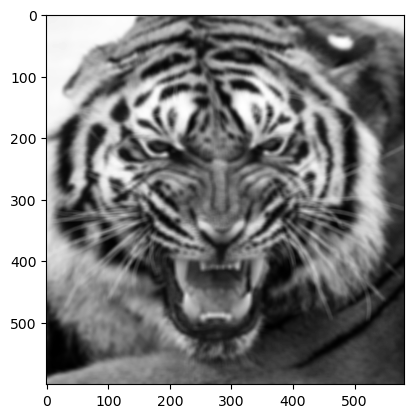

In [75]:
# np.ones() producs filter filled only with units
conv_filter = np.ones([7, 7]) / 9
plt.imshow(tiger_grayscale, cmap = 'gray')
plt.show()
plt.imshow(convolve(tiger_grayscale, conv_filter), cmap = 'gray')
plt.show()

In [ ]:
conv_filter = np.array([
    
])
plt.imshow(tiger_grayscale, cmap = 'gray')
plt.show()
plt.imshow(convolve(tiger_grayscale, conv_filter), cmap = 'gray')
plt.show()